In [27]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn import metrics
from xgboost import XGBRFClassifier
import pickle

In [28]:
data_dir = "../Data/Quora-Data/"

In [29]:
df_test = pd.read_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv")
df_train = pd.read_csv(data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv")

In [6]:
df_train.head()

,num_word_q1,num_word_q2,num_char_q1,num_common_words,first_word_same,last_word_same,first_2_same,last_2_same,common_word_ratio,num_sent_diff,...,glv_q2_47,glv_q2_48,glv_q2_49,glove_dist_l2,glove_dist_l1,glove_dist_l2_avg,glove_dist_l1_avg,glove_cosine,glove_cosine_avg,Y
0,10,15,10,6,1,1,0.5,1.0,0.230769,0.40,...,-2.63903,-2.586603,-2.678800,23.877401,120.711778,1.730831,9.443650,0.861538,0.861538,0
1,21,21,21,16,1,0,1.0,0.5,0.372093,0.00,...,0.84824,-2.558681,5.540800,3.012427,17.243687,0.251036,1.436974,0.995348,0.995348,1
2,7,10,7,6,0,0,0.5,0.0,0.333333,0.25,...,-0.23349,-1.679359,0.288054,5.277842,25.235731,0.599229,3.322078,0.979123,0.979123,1
3,11,9,11,4,1,1,0.5,0.5,0.190476,0.00,...,3.54177,0.141241,1.935360,5.150361,28.285059,0.735766,4.040723,0.978515,0.978515,1
4,21,10,21,6,1,0,0.5,0.0,0.187500,0.00,...,1.17154,-2.513794,-1.113293,19.541998,83.745660,0.878743,4.815660,0.964741,0.964741,0


In [30]:
X_train=df_train.drop(columns=['first_word_same_proc','first_2_same','num_word_q2_proc','num_char_q1_proc','num_word_q1_proc','num_word_q2','num_char_q1','num_word_q1','num_sent_diff','num_sent_diff_proc','last_word_same_proc','Y'])
Y_train=df_train['Y']

In [31]:
X_train

,num_common_words,first_word_same,last_word_same,last_2_same,common_word_ratio,num_word_diff_ratio,num_common_words_proc,first_2_same_proc,last_2_same_proc,common_word_ratio_proc,num_word_diff_ratio_proc,lcs_ratio_max,lcs_ratio_min,fuzz_rat,fuzz_part_rat,fuzz_rat_proc,fuzz_part_rat_proc,glv_q1_0,glv_q1_1,glv_q1_2,glv_q1_3,glv_q1_4,glv_q1_5,glv_q1_6,glv_q1_7,glv_q1_8,glv_q1_9,glv_q1_10,glv_q1_11,glv_q1_12,glv_q1_13,glv_q1_14,glv_q1_15,glv_q1_16,glv_q1_17,glv_q1_18,glv_q1_19,glv_q1_20,glv_q1_21,glv_q1_22,glv_q1_23,glv_q1_24,glv_q1_25,glv_q1_26,glv_q1_27,glv_q1_28,glv_q1_29,glv_q1_30,glv_q1_31,glv_q1_32,glv_q1_33,glv_q1_34,glv_q1_35,glv_q1_36,glv_q1_37,glv_q1_38,glv_q1_39,glv_q1_40,glv_q1_41,glv_q1_42,glv_q1_43,glv_q1_44,glv_q1_45,glv_q1_46,glv_q1_47,glv_q1_48,glv_q1_49,glv_q2_0,glv_q2_1,glv_q2_2,glv_q2_3,glv_q2_4,glv_q2_5,glv_q2_6,glv_q2_7,glv_q2_8,glv_q2_9,glv_q2_10,glv_q2_11,glv_q2_12,glv_q2_13,glv_q2_14,glv_q2_15,glv_q2_16,glv_q2_17,glv_q2_18,glv_q2_19,glv_q2_20,glv_q2_21,glv_q2_22,glv_q2_23,glv_q2_24,glv_q2_25,glv_q2_26,glv_q2_27,glv_q2_28,glv_q2_29,glv_q2_30,glv_q2_31,glv_q2_32,glv_q2_33,glv_q2_34,glv_q2_35,glv_q2_36,glv_q2_37,glv_q2_38,glv_q2_39,glv_q2_40,glv_q2_41,glv_q2_42,glv_q2_43,glv_q2_44,glv_q2_45,glv_q2_46,glv_q2_47,glv_q2_48,glv_q2_49,glove_dist_l2,glove_dist_l1,glove_dist_l2_avg,glove_dist_l1_avg,glove_cosine,glove_cosine_avg
0,6,1,1,1.0,0.230769,0.192308,4,0.0,1.0,0.230769,0.192308,0.267857,0.468750,0.61,0.74,0.53,0.84,0.574287,0.952050,-4.277600,-0.549085,-1.295090,-0.486051,4.119830,-3.576410,5.513970,2.382081,2.206471,1.446930,-16.645241,-1.701020,-1.327406,-0.610185,3.171266,0.393000,-0.455940,-0.731443,-5.777350,-2.023494,-0.215490,-1.148629,-3.765890,-1.912476,-1.026341,-0.831048,0.002410,3.238470,-0.544527,1.105740,0.738860,-4.517820,4.226392,-1.189130,1.245238,-1.476610,0.025200,-0.919003,-2.916834,5.118820,-3.509770,0.234040,2.361523,-1.118637,-3.009320,-1.617396,-0.426610,0.953710,2.140900,-1.313500,-2.522428,0.573515,-3.194859,2.150905,5.845458,-2.264090,1.683018,4.030598,4.147276,3.470965,-30.612049,-1.277566,0.043689,-2.880514,3.830866,-0.331105,-3.382467,-5.671059,-4.095040,-5.607650,0.250640,-1.685527,-1.027150,-6.354444,-1.618650,-1.929915,7.662377,4.665900,-3.675701,0.095530,-2.800520,-2.321861,8.122553,-1.460872,-1.616915,0.181258,-0.171130,-3.287157,-11.664200,8.680750,-4.210682,-0.877618,3.577368,-3.228940,-3.090590,-2.639030,-2.586603,-2.678800,23.877401,120.711778,1.730831,9.443650,0.861538,0.861538
1,16,1,0,0.5,0.372093,0.000000,7,1.0,0.5,0.372093,0.000000,0.657895,0.675676,0.94,0.94,0.90,0.89,-0.120880,3.837722,-1.053720,-3.296465,-0.714010,2.445542,2.620588,-4.252527,2.054083,-1.490960,0.663928,-5.806901,-23.884239,2.102450,4.855162,1.754219,3.643057,1.556430,3.117360,-3.867201,0.359980,-1.031261,-0.102270,-1.187550,1.001988,0.255240,-2.029098,3.563557,0.492540,0.968195,-0.603531,-1.257331,2.177843,-3.343814,4.474693,-1.517522,-3.877770,2.829770,2.312590,-0.481157,-6.212583,-3.802020,1.042250,0.677330,-2.902514,0.860566,-2.069741,0.767630,-2.543561,5.639610,0.218250,3.793712,-1.008630,-3.577785,-0.443080,2.070685,3.082438,-4.096248,1.530493,-1.377540,1.013253,-6.569045,-24.380604,2.047170,5.645012,1.124069,3.458947,0.988615,3.093950,-3.801201,0.641560,-1.593431,0.551240,-1.327090,0.829188,-0.625410,-1.796490,3.897860,0.992240,0.587566,-0.530769,-1.864751,1.506843,-2.741164,4.074643,-1.022972,-3.846110,2.669610,1.824077,0.128943,-6.327290,-3.734580,1.974500,0.869410,-2.934354,0.310496,-1.720261,0.848240,-2.558681,5.540800,3.012427,17.243687,0.251036,1.436974,0.995348,0.995348
2,6,0,0,0.0,0.333333,0.166667,5,1.0,0.5,0.333333,0.166667,0.935484,0.966667,0.78,0.90,0.97,1.00,1.593729,0.476363,-2.594870,-0.223915,3.171570,-0.158643,1.289348,-0.536440,1.946650,-0.150550,-1.041621,-1.362940,-14.371029,-1.036108,-0.003968,0.094397,0.923352,0.335843,0.660670,-0.013700,-0.460674,-0.702535,0.594345,0.029440,-1.472307,1.530530,1.977519,-0.374556,0.859150,-1.220656,1.443406,1.527402,-0.176728,-1.946207

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

In [33]:
pd.options.display.max_columns = 4000
X_train_norm.head()

,num_common_words,first_word_same,last_word_same,last_2_same,common_word_ratio,num_word_diff_ratio,num_common_words_proc,first_2_same_proc,last_2_same_proc,common_word_ratio_proc,num_word_diff_ratio_proc,lcs_ratio_max,lcs_ratio_min,fuzz_rat,fuzz_part_rat,fuzz_rat_proc,fuzz_part_rat_proc,glv_q1_0,glv_q1_1,glv_q1_2,glv_q1_3,glv_q1_4,glv_q1_5,glv_q1_6,glv_q1_7,glv_q1_8,glv_q1_9,glv_q1_10,glv_q1_11,glv_q1_12,glv_q1_13,glv_q1_14,glv_q1_15,glv_q1_16,glv_q1_17,glv_q1_18,glv_q1_19,glv_q1_20,glv_q1_21,glv_q1_22,glv_q1_23,glv_q1_24,glv_q1_25,glv_q1_26,glv_q1_27,glv_q1_28,glv_q1_29,glv_q1_30,glv_q1_31,glv_q1_32,glv_q1_33,glv_q1_34,glv_q1_35,glv_q1_36,glv_q1_37,glv_q1_38,glv_q1_39,glv_q1_40,glv_q1_41,glv_q1_42,glv_q1_43,glv_q1_44,glv_q1_45,glv_q1_46,glv_q1_47,glv_q1_48,glv_q1_49,glv_q2_0,glv_q2_1,glv_q2_2,glv_q2_3,glv_q2_4,glv_q2_5,glv_q2_6,glv_q2_7,glv_q2_8,glv_q2_9,glv_q2_10,glv_q2_11,glv_q2_12,glv_q2_13,glv_q2_14,glv_q2_15,glv_q2_16,glv_q2_17,glv_q2_18,glv_q2_19,glv_q2_20,glv_q2_21,glv_q2_22,glv_q2_23,glv_q2_24,glv_q2_25,glv_q2_26,glv_q2_27,glv_q2_28,glv_q2_29,glv_q2_30,glv_q2_31,glv_q2_32,glv_q2_33,glv_q2_34,glv_q2_35,glv_q2_36,glv_q2_37,glv_q2_38,glv_q2_39,glv_q2_40,glv_q2_41,glv_q2_42,glv_q2_43,glv_q2_44,glv_q2_45,glv_q2_46,glv_q2_47,glv_q2_48,glv_q2_49,glove_dist_l2,glove_dist_l1,glove_dist_l2_avg,glove_dist_l1_avg,glove_cosine,glove_cosine_avg
0,0.480816,1.010643,1.511933,1.792307,0.211293,0.346284,0.174789,-1.004594,1.357088,0.211293,0.346284,-0.483315,-0.089538,0.095089,0.538039,-0.371437,0.758916,-0.393144,0.185175,-1.445079,-0.274626,-0.982840,-0.827491,0.293283,-2.060631,2.456894,0.674255,1.756299,1.468434,0.435038,-1.457777,-0.855676,-0.424875,1.355573,0.577739,-0.006585,0.137642,-2.928994,-0.929602,0.117003,-0.932244,-1.645141,-0.966901,-0.864584,-0.234252,-0.792582,1.990996,-0.622894,0.674516,0.358906,-1.460611,0.544949,-0.626345,1.045605,-0.815460,0.120709,0.210835,0.483851,2.437400,-2.033251,0.055212,0.776226,0.130116,-1.864974,-1.358972,0.778479,1.058519,0.361809,-1.188184,-0.475941,0.400253,-1.957619,0.656911,0.813161,-1.339245,0.240275,1.376668,3.104403,2.530581,-0.603070,-1.167313,-0.227738,-1.755092,1.780409,0.149006,-1.452054,-2.506440,-2.010495,-2.772399,0.413722,-1.234800,-0.151098,-2.847458,-1.204770,-0.899374,2.754144,2.736170,-2.317844,0.114545,-1.797784,-0.265172,1.941213,-0.798816,-0.839417,0.023488,0.010070,-0.976935,-1.654904,4.269790,-2.409896,-0.751617,1.419938,-0.934356,-1.877547,-1.900283,-0.501823,-1.003156,0.865677,1.222111,1.067908,1.090804,-0.923827,-0.923827
1,3.709244,1.010643,-0.661405,0.533814,1.400809,-1.076672,1.840524,1.521718,-0.644032,1.400809,-1.076672,1.054068,0.690713,1.614730,1.608844,1.287453,1.004835,-0.744142,1.939464,0.302950,-1.887175,-0.662328,0.871916,-0.270862,-2.427791,0.462575,-1.231203,0.677920,-2.525707,-0.172406,0.949731,1.928045,0.965558,1.664743,1.293371,1.900385,-1.632076,0.300259,-0.400414,0.186926,-0.955779,0.929911,-0.035770,-1.469948,2.560856,-0.555913,0.707774,-0.656111,-0.612976,1.256195,-0.812754,0.640833,-0.840391,-2.353550,1.350713,1.490316,0.432846,-0.379124,-2.506487,0.931354,0.376900,-2.454264,1.192670,-1.245605,0.022106,-0.529661,3.722386,-0.580524,1.882407,0.328865,-2.009141,-0.480719,0.612055,-0.120426,-2.315584,0.154173,-1.153906,0.928599,-2.885748,-0.146933,0.884561,2.260737,0.572626,1.538810,0.947406,1.831857,-1.502316,0.439892,-0.683001,0.596670,-1.027123,0.831296,-0.404724,-1.309886,2.736476,-0.325189,0.502171,-0.589671,-0.937767,0.831078,-0.491354,0.443690,-0.519933,-2.286989,1.255951,1.202676,0.725053,-0.349053,-2.426591,1.463544,0.506317,-2.395546,0.883143,-0.997614,0.068779,-0.485380,3.622132,-0.830631,-0.895114,-1.568153,-1.553815,0.916157,0.916157
2,0.480816,-0.989469,-0.661405,-0.724678,1.074570,0.156556,0.730034,1.521718,-0.644032,1.074570,0.156556,2.148222,1.787948,0.877934,1.394683,1.601297,1.545857,0.121583,-0.104009,-0.532681,-0.083770,1.480876,-0.637696,-0.771790,-0.409797,0.400649,-0.571749,-0.514415,-0.078751,0.625873,-1.036903,-0.2597

In [34]:
model = XGBRFClassifier(n_estimators=100, subsample=0.8,loss='log_loss')

In [54]:
model.fit(X_train_norm.to_numpy(),Y_train)

[19:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', loss='log_loss', max_delta_step=0,
                max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
X_test=df_test.drop(columns=['first_word_same_proc','first_2_same','num_word_q2_proc','num_char_q1_proc','num_word_q1_proc','num_word_q2','num_char_q1','num_word_q1','num_sent_diff','num_sent_diff_proc','last_word_same_proc','Y','q1_orig','q2_orig','question1','question2','id','qid1','qid2'])
Y_test=df_test['Y']

In [10]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_norm=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [11]:
X_test=df_test.drop(columns=['Y'])
Y_test=df_test['Y']
scaler = StandardScaler()
scaler.fit(X_test)
X_test_norm=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [28]:
Y_pred=model.predict(X_test_norm)

D:\Anaconda3\envs\ml_2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [29]:
print("XG Boost RF Classifier:"+str(metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_test, Y_pred,target_names=['0','1']))
print(metrics.confusion_matrix(Y_test, Y_pred))

XG Boost RF Classifier:0.7351777189641099
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     51128
           1       0.62      0.74      0.67     29730

    accuracy                           0.74     80858
   macro avg       0.72      0.74      0.73     80858
weighted avg       0.75      0.74      0.74     80858

[[37345 13783]
 [ 7630 22100]]


In [31]:
model.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'use_label_encoder': True,
 'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 100,
 'random_state': 0,
 'reg_alpha': 0,
 'scale_pos_weight': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [34]:
pickle.dump(model, open("XGBRF_CF_0.74", 'wb'))

Text(80.90000000000006, 0.5, 'predicted label')

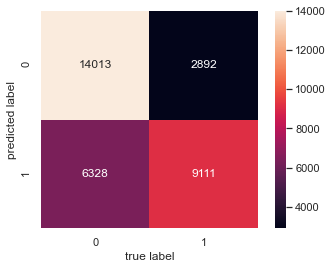

In [37]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = np.asarray([[14013,6328],[2892,9111]])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xlabel('true label')
plt.ylabel('predicted label')


In [40]:
loaded_model = pickle.load(open("XGBRF_CF_0.74", 'rb'))

In [44]:
X_train_Sample=df_train.drop(columns=['Y'])
Y_train=df_train['Y']

In [46]:
scaler = StandardScaler()
scaler.fit(X_train_Sample)
X_train_Sample_norm=pd.DataFrame(scaler.transform(X_train_Sample),columns=X_train_Sample.columns)

In [48]:
train_probabs=loaded_model.predict_proba(X_train_Sample_norm)

In [49]:
train_probabs.shape

(323432, 2)

In [50]:
np.savetxt("XGRF_probas_train_0.74.csv",train_probabs,delimiter=',')